# 第一部分: 绘制末端距和外力随时间的变化

In [11]:
import matplotlib.pyplot as plt 
import pandas as pd

In [12]:
data1 = pd.read_csv('dist_vs_force_pure', sep=' ', header=None)

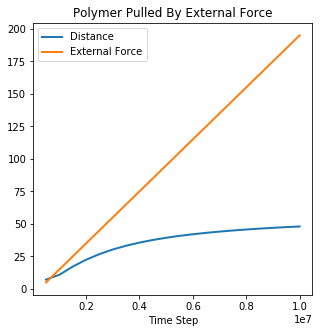

In [40]:
fig = plt.figure(figsize=(5,5))
plt.title('Polymer Pulled By External Force')
ax = fig.add_subplot(111)
ax.plot(data1[0],data1[1], label='Distance',linewidth=2.0)
ax.plot(data1[0],data1[2], label='External Force',linewidth=2.0)
plt.legend()
plt.xlabel('Time Step')
plt.savefig('./pic/result.svg')
plt.savefig('./pic/result.png')
plt.show()

# 第二部分: 绘回旋半径随时间的变化

In [53]:
# 导入numpy库, 重命名为np用来处理数据
import numpy as np

In [54]:
# 数据预处理使用Linux下的awk命令
# awk 'NR%49>9 || NR%49==0 {print $2,$3}'  lammps.out  > out.data
data2 = np.loadtxt('out.data')

In [64]:
# 显示坐标数据(x,y) 这里是二维的数据
data2

array([[-3.99918e+01, -9.45931e-02],
       [-3.98371e+01, -1.87030e-02],
       [-3.99836e+01, -1.06391e+00],
       ...,
       [ 4.21922e+00,  5.65585e-01],
       [ 5.53129e+00,  6.28555e-01],
       [ 6.79325e+00,  7.09982e-01]])

In [65]:
# 使用数据的形状
data2.shape

(40040, 2)

## 利用公式计算回旋半径
回旋半径:
$$R^2_g = \frac{1}{n}\sum_{i=0}^n(r_i -r_c)^2 \tag{1}$$
其中质心到原点的距离:
$$r_c = \frac{\sum{_i^nm_i\vec{r_i}}}{\sum{_{i=0}^nm_i}} = \frac{\sum{_{i=0}^n\vec{r_i}}}{n} \tag{2}$$
这个例子是二维的,因此:
$$r_i = \sqrt{x_i^2+y_i^2} \tag{3}$$

In [70]:
num_particle = 40
rg_list = []
for i in range(data.shape[0]):
    if i % num_particle == 0:
        # 1.算出质心到原点的距离r_c
        sum_r = 0
        for j in range(num_particle):
            x,y = data[i+j,0],data[i+j,1]
            sum_r += (x**2 + y**2)**(0.5)
        r_c = sum_r/num_particle
        
        # 2.计算回旋半径
        rg = 0
        for j in range(num_particle):
            x,y = data[i+j,0],data[i+j,1]
            r = (x**2 + y**2)**(0.5)
            rg += (r - r_c)**2
        rg /= num_particle
        rg = rg**(0.5)
        rg_list.append(rg)

In [71]:
# rg_list
# data1[0]

In [72]:
len(rg_list)

1001

In [73]:
# 将list转换成np.array,便于绘图
rg_array = np.array(rg_list)

In [74]:
rg_array

array([ 0.1620287 ,  0.51413461,  0.32762174, ..., 12.25181563,
       12.23127788, 12.28608015])

In [75]:
rg_array.shape

(1001,)

In [76]:
time_step = np.array(list(range(1001)))*10000

In [77]:
time_step

array([       0,    10000,    20000, ...,  9980000,  9990000, 10000000])

In [78]:
time_step.shape

(1001,)

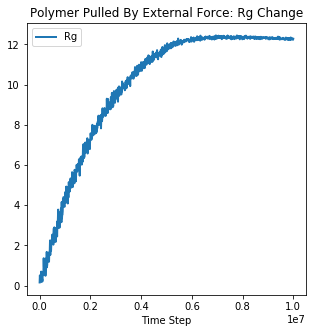

In [81]:
fig = plt.figure(figsize=(5,5))
plt.title('Polymer Pulled By External Force: Rg Change')
ax = fig.add_subplot(111)
ax.plot(time_step,rg_array, label='Rg',linewidth=2.0)
plt.legend()
plt.xlabel('Time Step')
plt.savefig('./pic/rg.svg')
plt.savefig('./pic/rg.png')
plt.show()

参考:[1] http://www.zqex.dk/index.php/teaching/lammps-demo